# Tele Communication Industry Churn Prediction

<div id="toc_container">
  <p class="toc_title">Table of Contents</p>
  <ul class="toc_list">
    <li><a href="#1-exploratory-data-analysis">1. Exploratory Data Analysis</a>
      <ul>
        <li><a href="#1-1-missing-values">1.1 Missing Values</a>
          <ul>
            <li><a href="#1-1-1-data-preparation">1.1.1 Data Preparation</a></li>
          </ul>
        </li>
        <li><a href="#1-2-characteristics-of-churned-customers">1.2 Characteristics of Churned Customers</a>
          <ul>
            <li><a href="#1-2-1-deep-dive-into-patients-with-internet-connection">1.2.1 Deep Dive into Patients with Internet Connection</a></li>
          </ul>
        </li>
        <li><a href="#1-4-relationship-between-categorical-variables">1.4 Relationship between categorical variables</a></li>
        <li><a href="#1-5-correlation-between-churn-rate-and-other-customer-characteristics">1.5 Correlation between Churn rate and other customer characteristics</a></li>
      </ul>
    </li>
    <li><a href="#2-churn-prediction">2. Churn Prediction</a>
      <ul>
        <li><a href="#2-1-logistic-regression">2.1 Logistic Regression</a></li>
        <li><a href="#2-2-support-vector-machine">2.2 Support Vector Machine</a></li>
        <li><a href="#2-3-random-forest-classifier">2.3 Random Forest Classifier</a></li>
      </ul>
    </li>
    <li><a href="#3-predicting-the-churn-rate">3. Predicting the churn rate</a></li>
  </ul>
</div>




## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View Code"></form>''')


In [210]:
df = pd.read_csv('/Users/lawshia/Desktop/Telecom Customer Churn Project/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [211]:
df.shape

(7043, 21)

In [212]:
#Truncating to get the training data for churn prediction model
df_model = df[:3000]
df_model.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [213]:
df_model.shape

(3000, 21)

In [214]:
df_model.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## 1.1 Missing Values

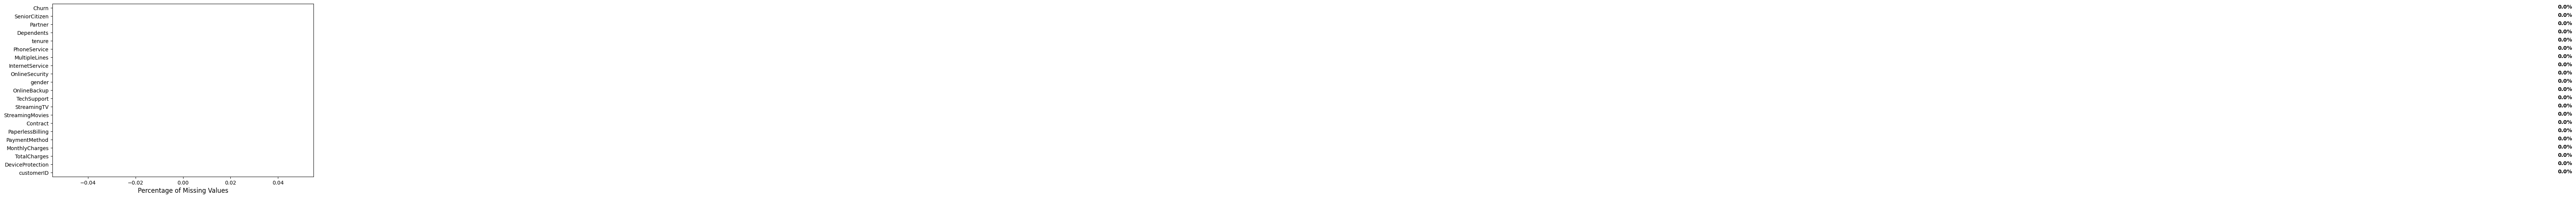

In [215]:
# Calculate percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Sort columns in ascending order of missing values
null_percent = missing_percent.sort_values(ascending=False)

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(9, 6))
null_percent.plot(kind='barh', color='grey')

# add data labels
for i, v in enumerate(null_percent):
    ax.text(v + 1, i - 0.1, f'{v:.1f}%', color='black', fontweight='bold')

# set x-axis label
ax.set_xlabel('Percentage of Missing Values', fontsize=12)

# show the plot
plt.show()


## 1.1.1 Data Preparation

In [216]:
try:
    df_model.loc[:,'TotalCharges'] = df_model['TotalCharges'].str.replace(' ','0').astype('float')
except:
    df_model.loc[:,'TotalCharges'] = df_model['TotalCharges'].astype('float')

## 1.2 Characteristis of Churned Customers

In [217]:
def bar_graph(df,column):

    # Group data by 'Churn' and 'Gender' and count occurrences
    gender_percent=((df[df['Churn']== 'Yes'][column].value_counts())/sum(df[df['Churn']== 'Yes'][column].value_counts()))*100

    # Create a bar plot
    ax = gender_percent.plot(kind='barh', stacked=True, figsize=(8, 6), color='grey')
    plt.title(f'{column} Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)


    # Annotate bars with percentage values

    for i, v in enumerate(gender_percent):
        ax.text(v + 1, i - 0.1, f'{v:.1f}%', color='black', fontweight='bold')


    plt.show()


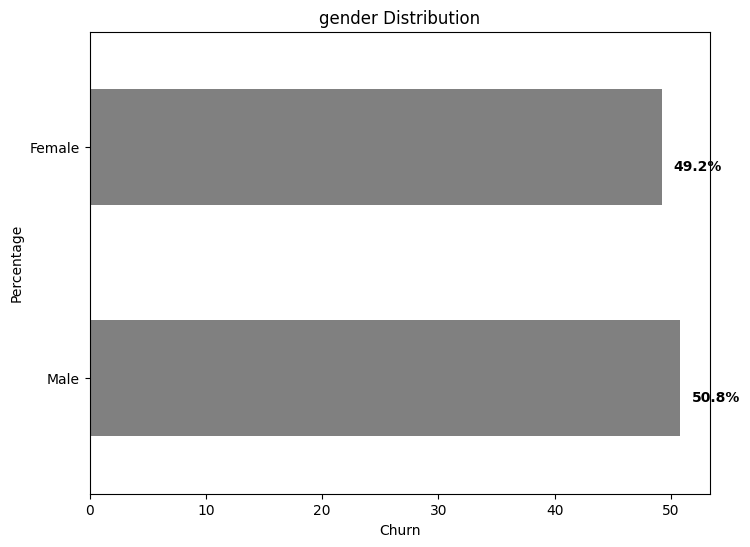

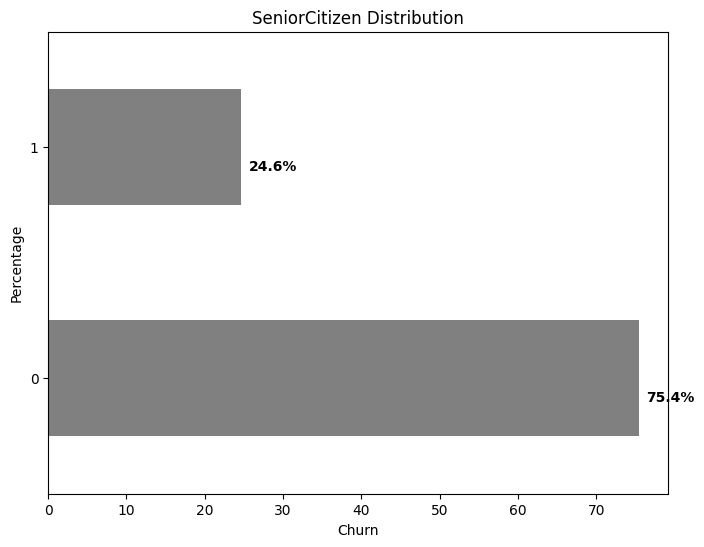

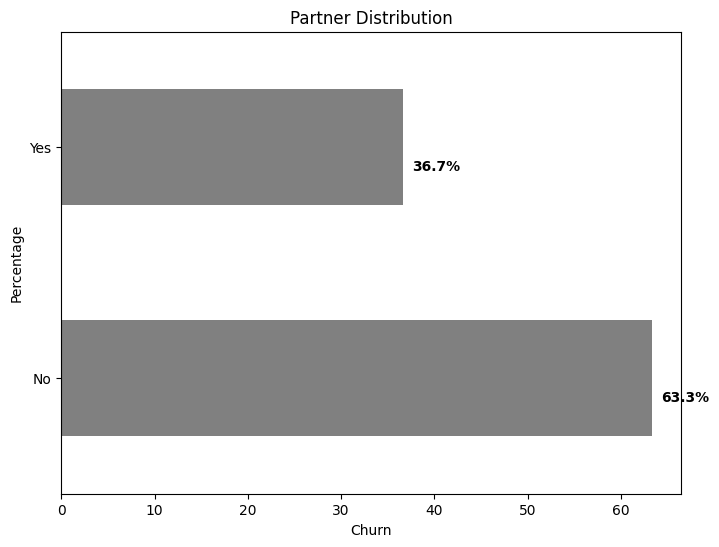

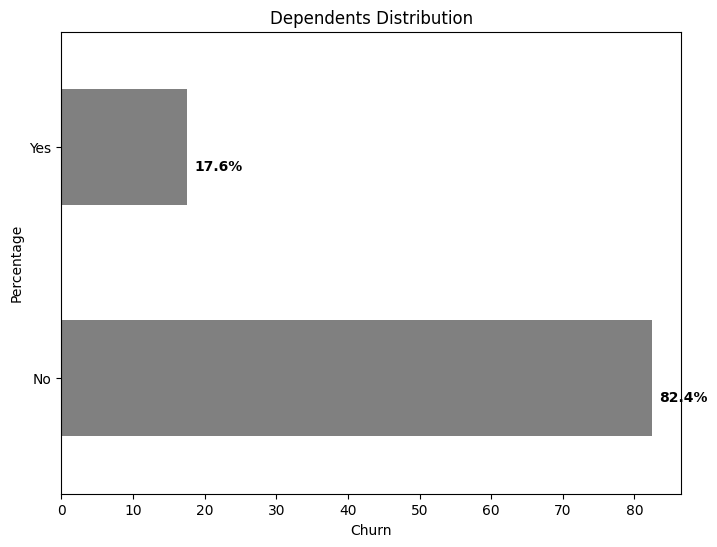

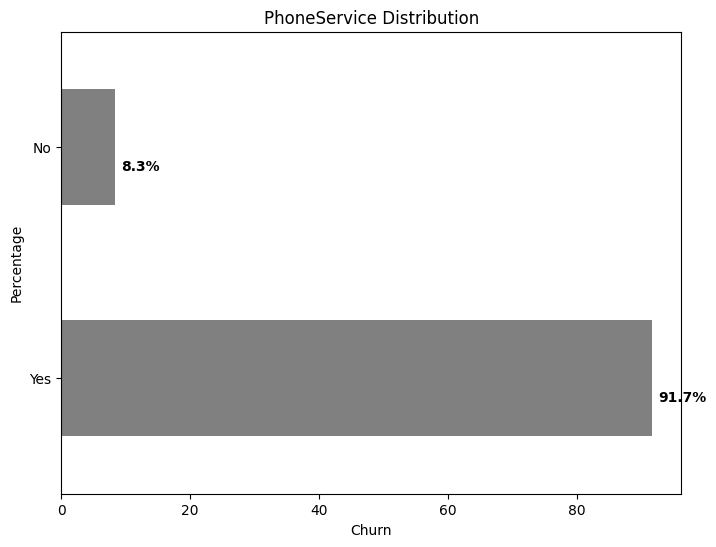

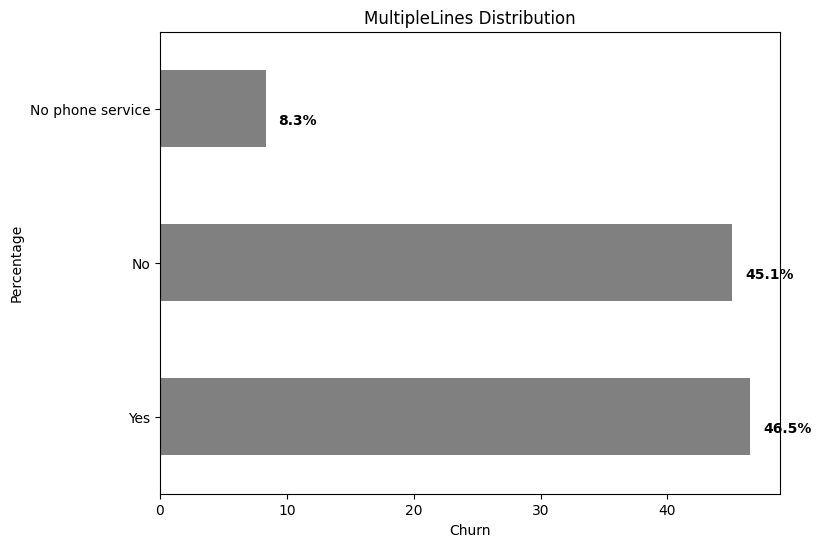

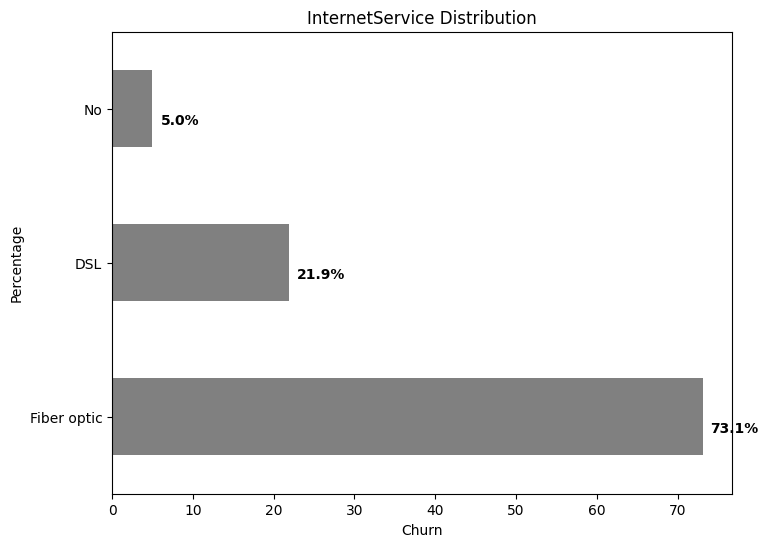

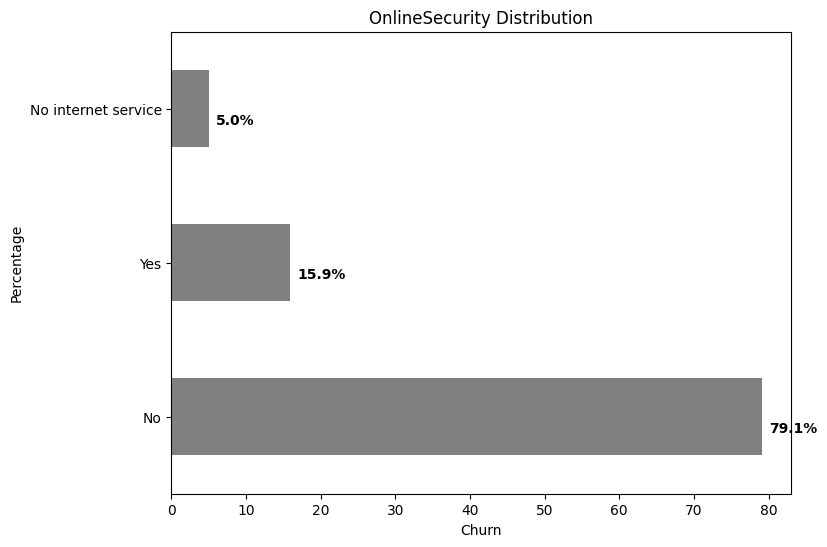

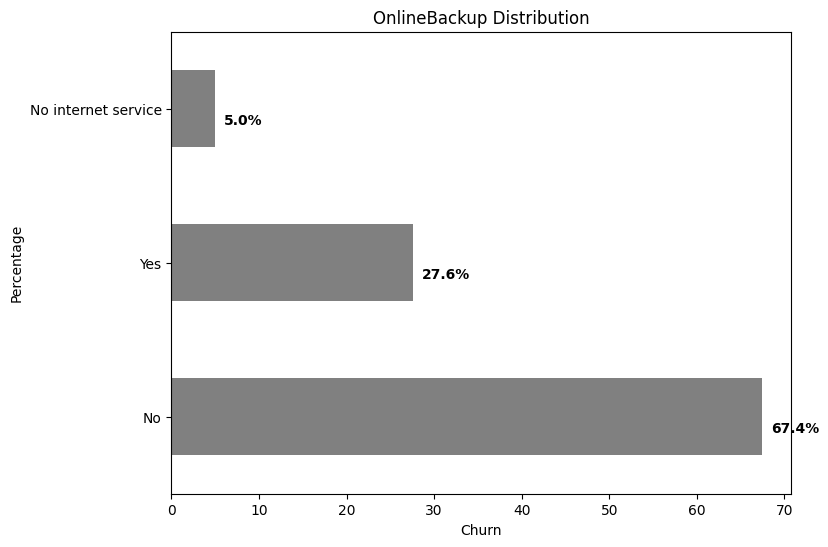

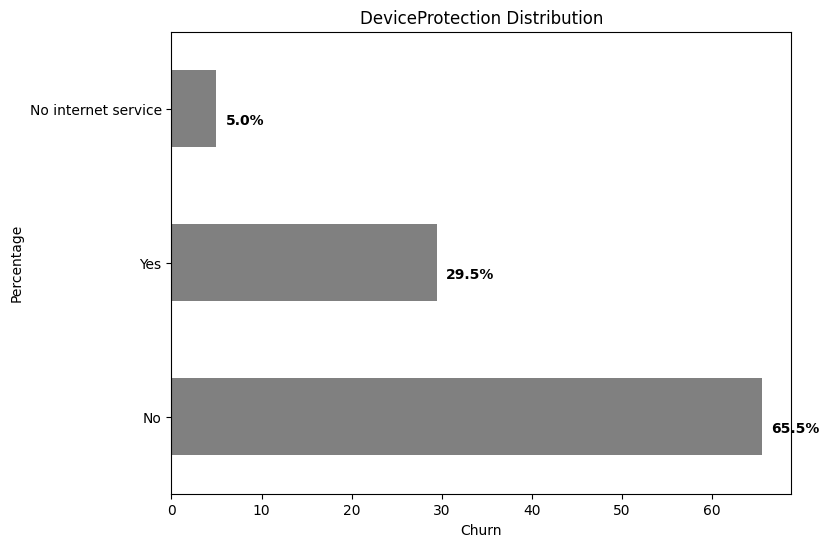

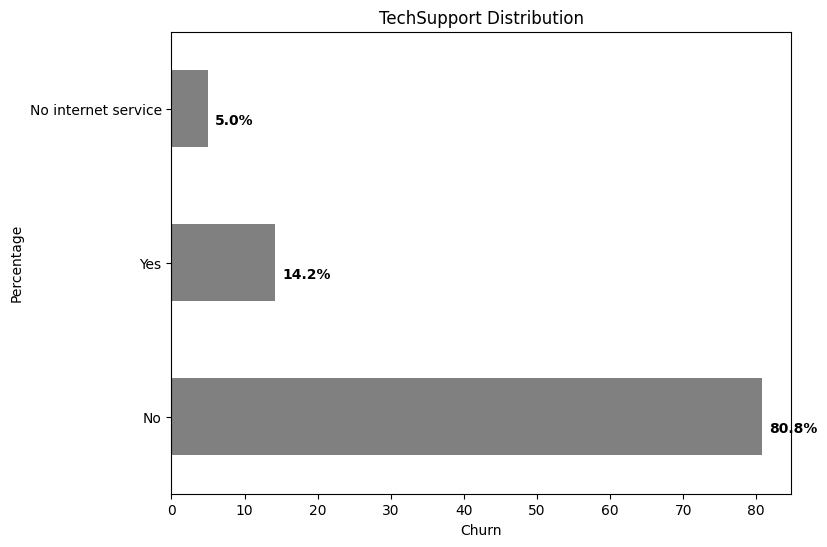

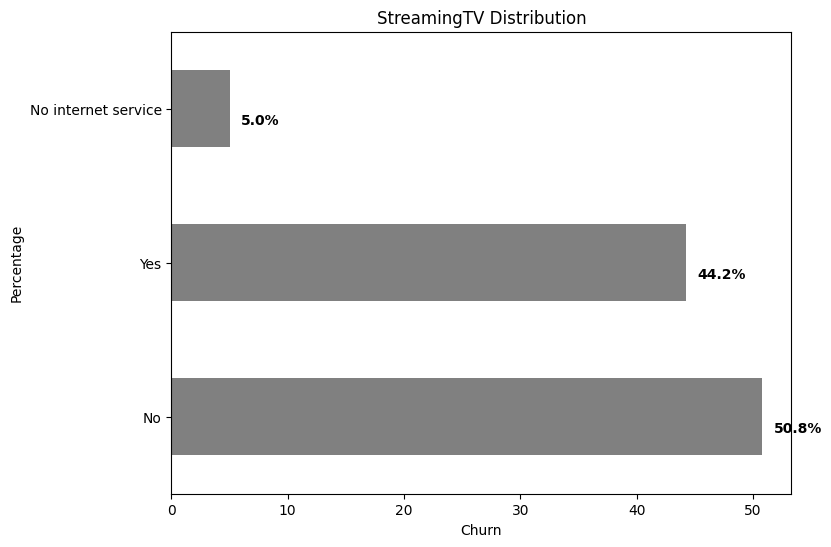

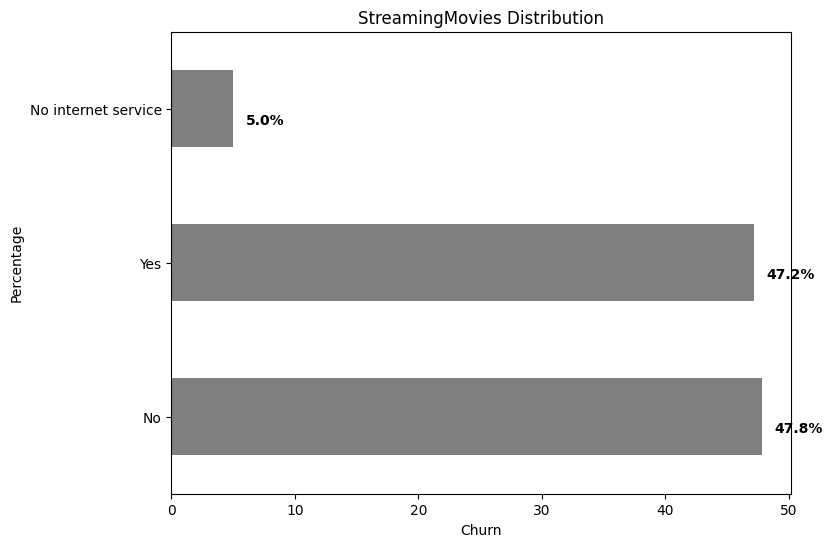

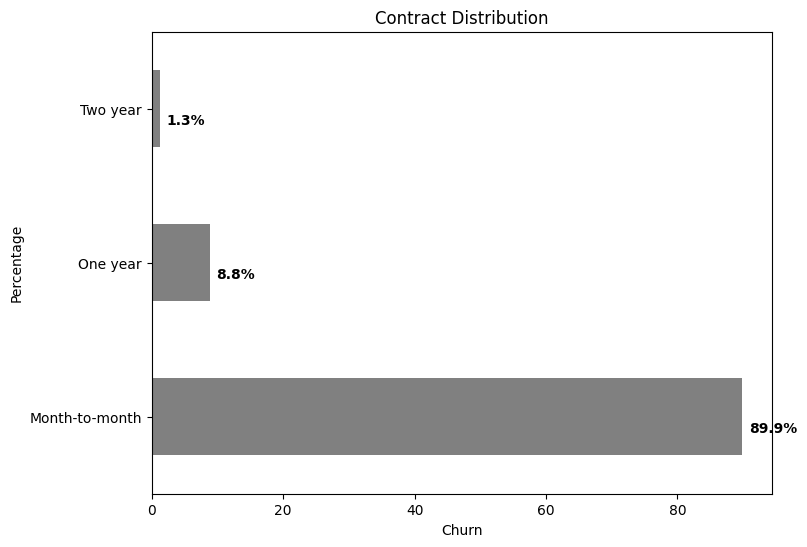

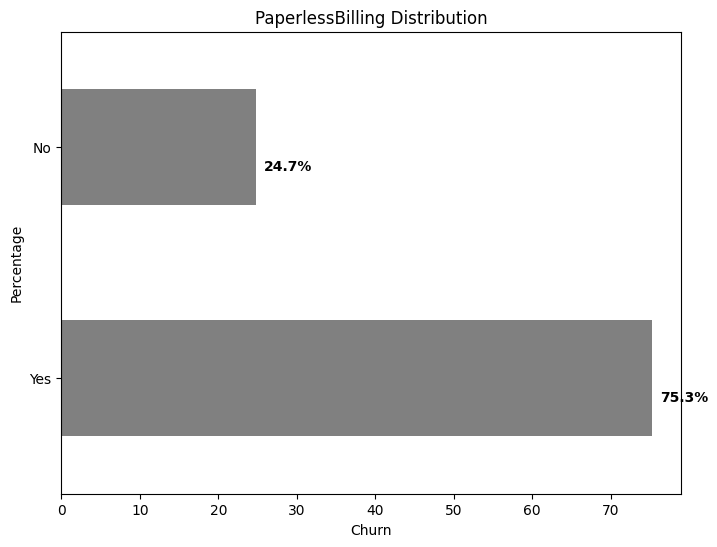

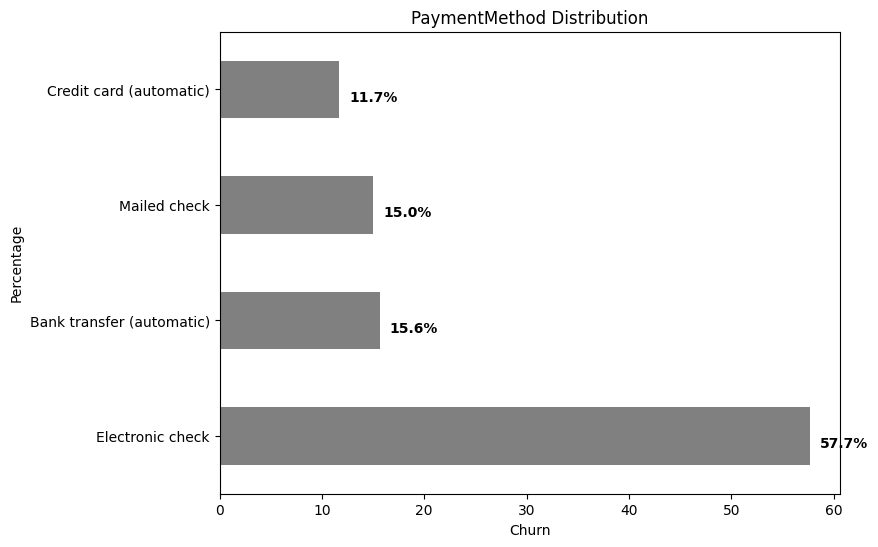

In [218]:

categ_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

for column in categ_columns:
    bar_graph(df_model,column)

### 1.2.1 Deep Dive into Patients with Internet Connection

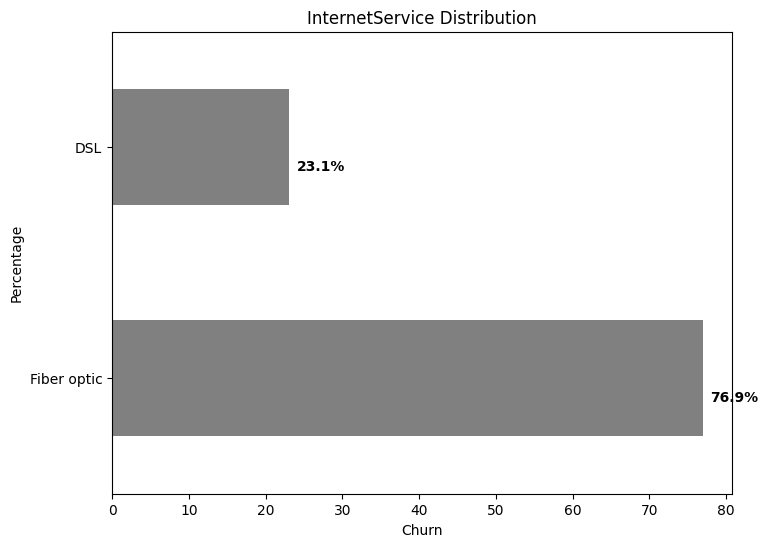

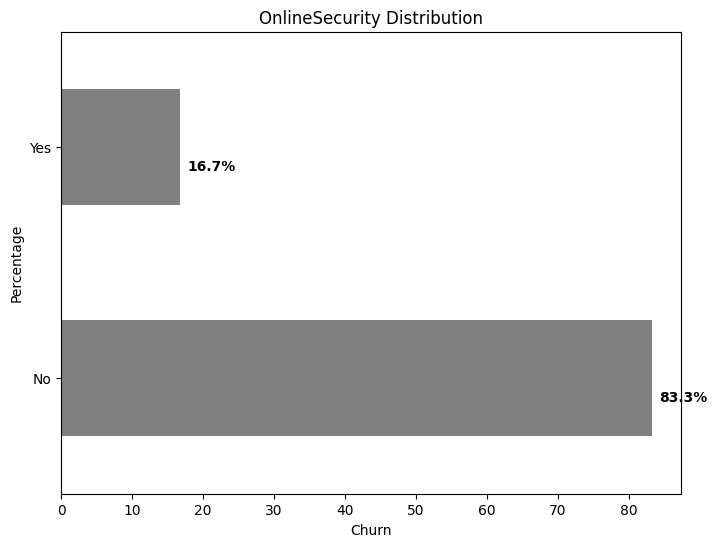

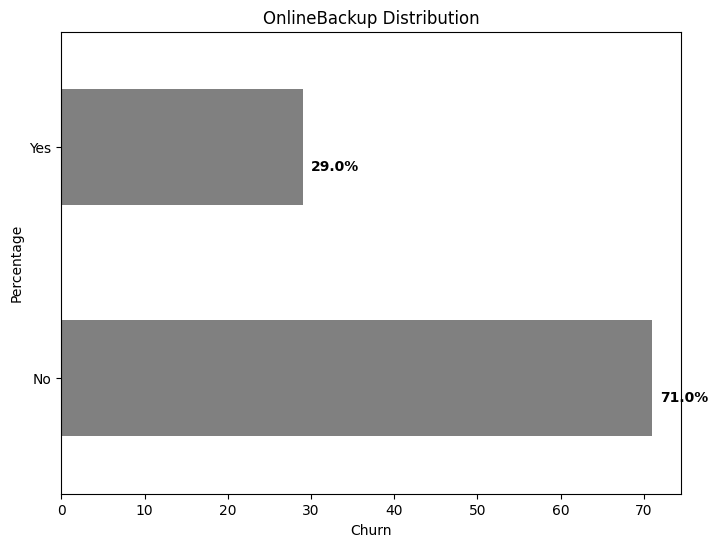

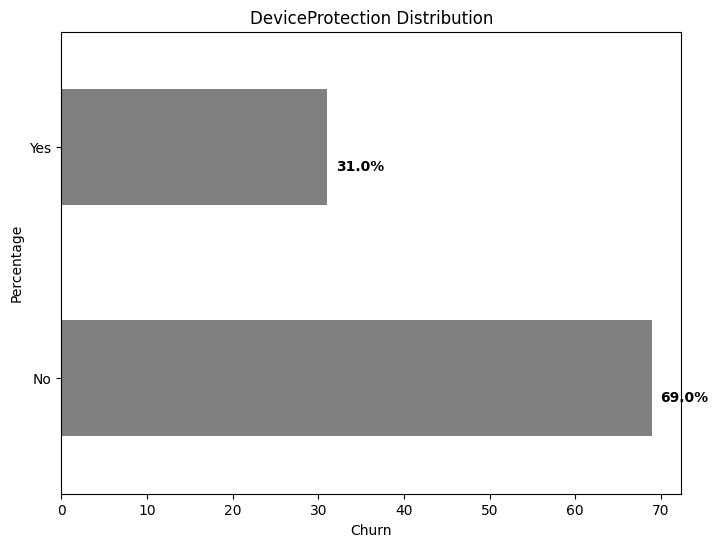

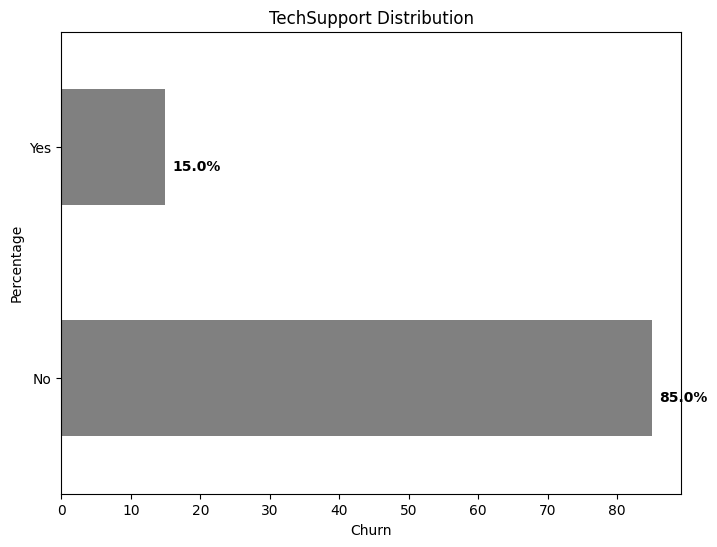

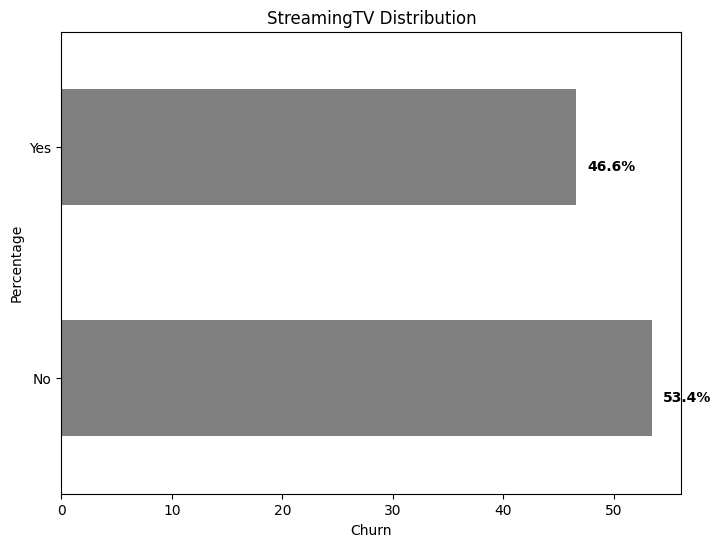

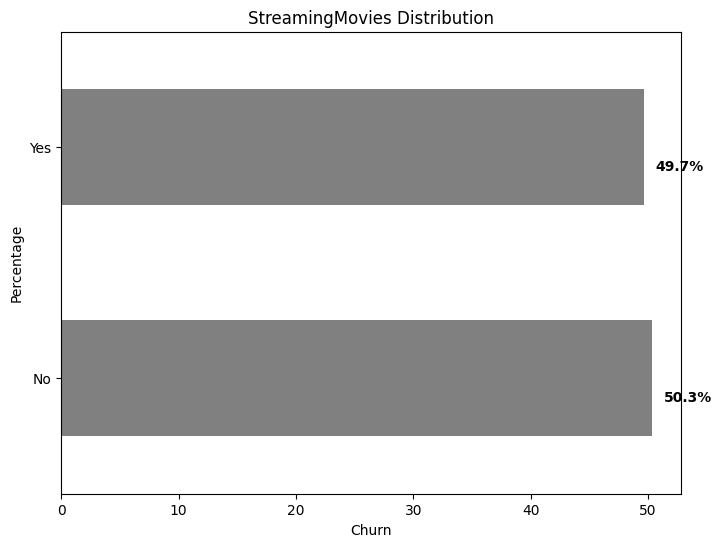

In [219]:
#Deep dive into internet service churn
df_internet_deep_dive = df_model[df_model['InternetService'].isin(['Fiber optic','DSL'])]

categ_columns=['InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

for column in categ_columns:
    bar_graph(df_internet_deep_dive,column)

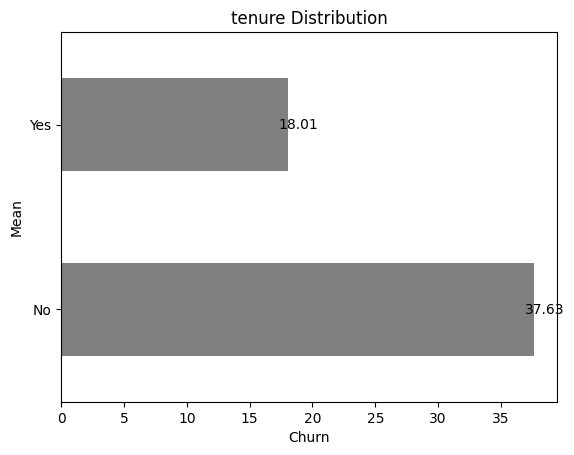

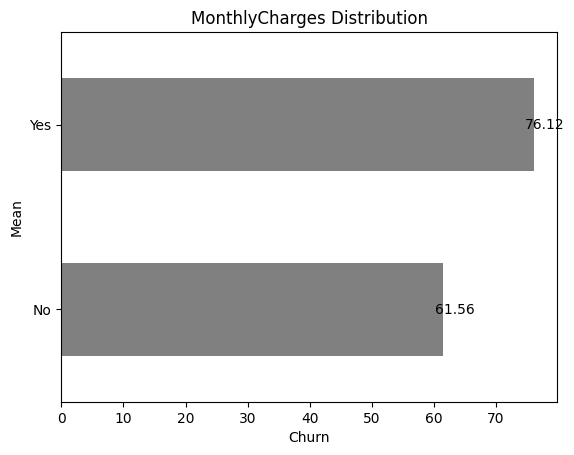

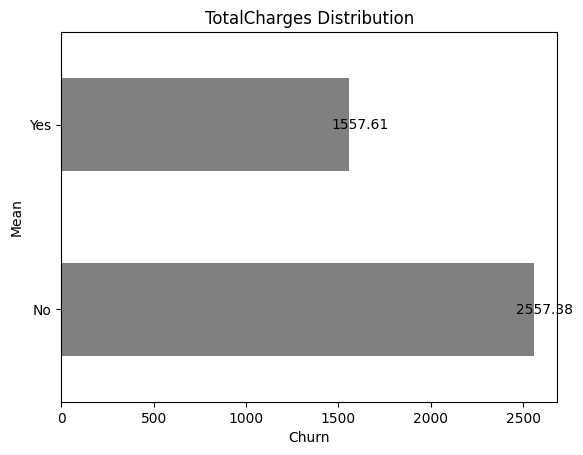

In [220]:
def continuous_bar_graph(column):
    plot_ax = df_model.groupby(['Churn'])[column].mean()
    ax = plot_ax.plot(kind='barh', color='grey')
    
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.2f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha = 'center', va = 'center', 
                    xytext = (8, 0), 
                    textcoords = 'offset points')
    
    plt.title(f'{column} Distribution')
    plt.xlabel('Churn')
    plt.ylabel('Mean')
    plt.xticks(rotation=0)

    plt.show()

continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in continuous_columns:
    continuous_bar_graph(col)


## 1.4 Relationship between categorical variables

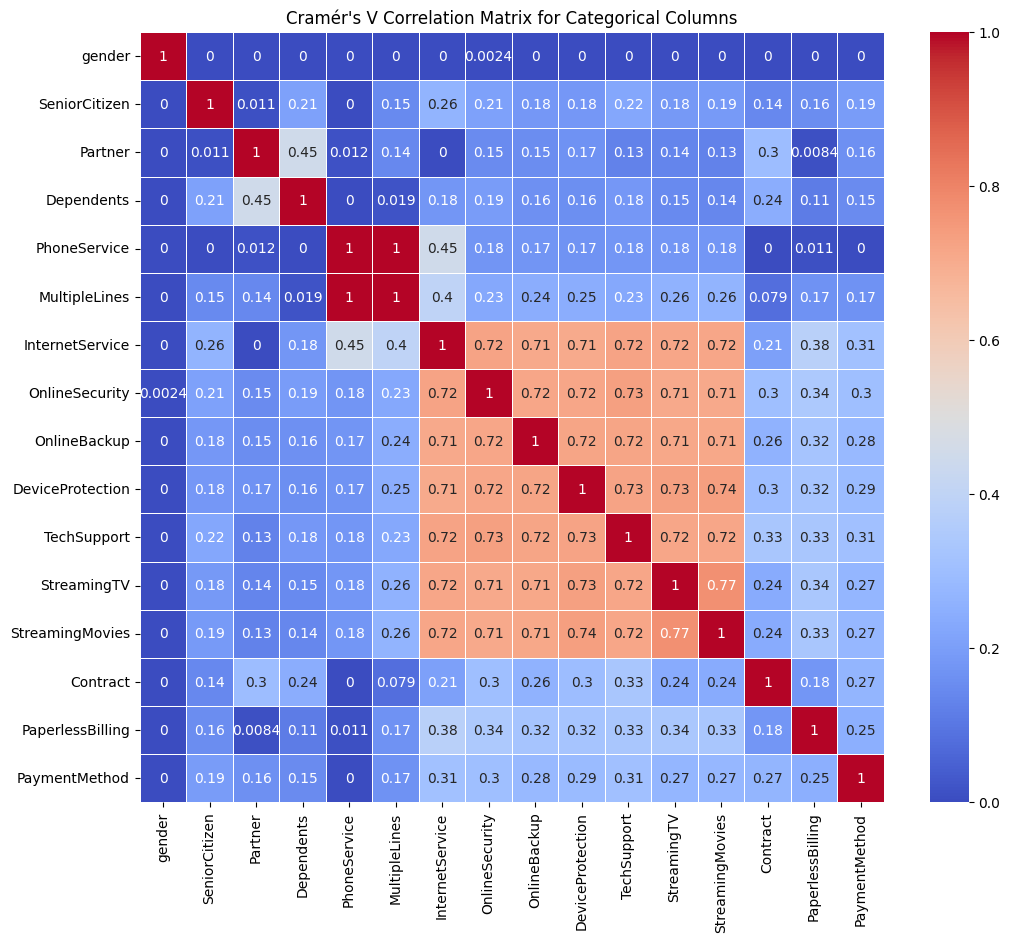

In [249]:

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

# Calculate Cramér's V for each pair of categorical columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)
for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Cramér's V Correlation Matrix for Categorical Columns")
plt.show()


## 1.5 Correlation between Churn rate and other customer characteristics

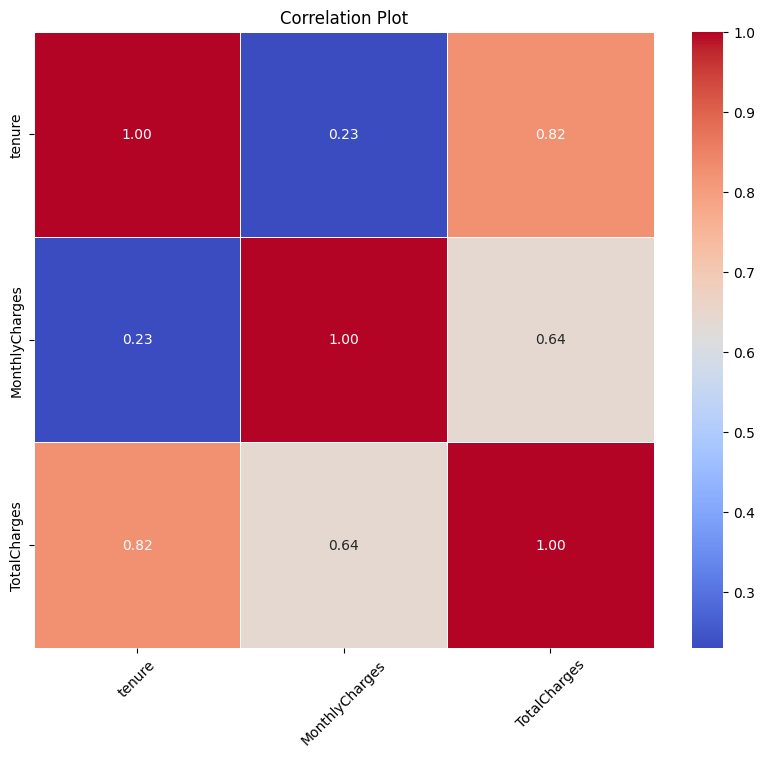

In [222]:
#correlation matrix
# Compute the correlation matrix
corr_matrix = df_model[['tenure','MonthlyCharges','TotalCharges']].corr()

# Create a correlation plot
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title('Correlation Plot')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


In [223]:

# Calculate Cramer's V for each categorical column
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
churn_column = df['Churn']

cramer_v_scores = {}
for col in categorical_columns:
    cramer_v_scores[col] = cramers_v(churn_column, df[col])



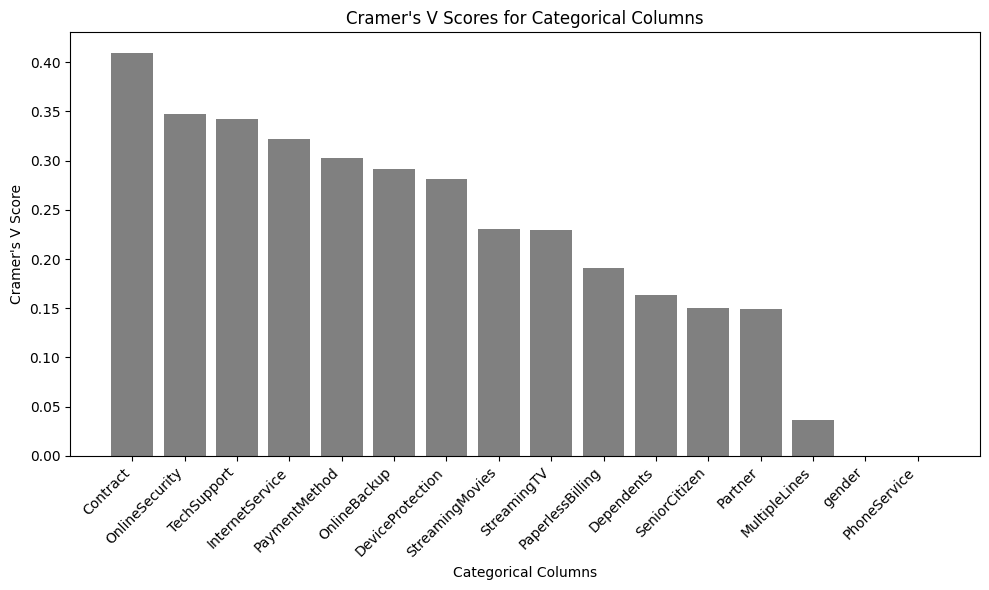

In [224]:
import matplotlib.pyplot as plt

# Assuming you already have the sorted dictionary
sorted_cramer_v_scores = dict(sorted(cramer_v_scores.items(), key=lambda x: x[1], reverse=True))

# Extract keys and values for plotting
categories = list(sorted_cramer_v_scores.keys())
cramer_values = list(sorted_cramer_v_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, cramer_values, color='grey')
plt.title("Cramer's V Scores for Categorical Columns")
plt.xlabel('Categorical Columns')
plt.ylabel("Cramer's V Score")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [225]:
# ANOVA
def ANOVA(continuous_column):
    groups = [group[continuous_column] for name, group in df_model.groupby('Churn')]
    f_statistic, p_value = f_oneway(*groups)
    print(f'{continuous_column} vs Churn')
    print(f'ANOVA F-statistic: {f_statistic:.2f}')
    print(f'P-value: {p_value:.4f}')
        
# df_model.loc[:,'TotalCharges'] = df_model['TotalCharges'].str.replace(' ','0').astype('float')
    
continuous_columns=['tenure','MonthlyCharges','TotalCharges']

for col in continuous_columns:
    ANOVA(col)

tenure vs Churn
ANOVA F-statistic: 416.50
P-value: 0.0000
MonthlyCharges vs Churn
ANOVA F-statistic: 140.93
P-value: 0.0000
TotalCharges vs Churn
ANOVA F-statistic: 115.73
P-value: 0.0000


In [ ]:
correlation_matrix = pd.DataFrame(index=continuous_columns, columns=continuous_columns)
correlation_matrix
for col1 in continuous_columns:
    for col2 in continuous_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# 2. Churn Prediction

## 2.1 Logistic regression 

Cross-Validation Scores: [0.82777778 0.79444444 0.79444444 0.78611111 0.78333333]
Mean CV Score: 0.7972222222222222
Confusion Matrix:
[[810  77]
 [139 174]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       887
           1       0.69      0.56      0.62       313

    accuracy                           0.82      1200
   macro avg       0.77      0.73      0.75      1200
weighted avg       0.81      0.82      0.81      1200



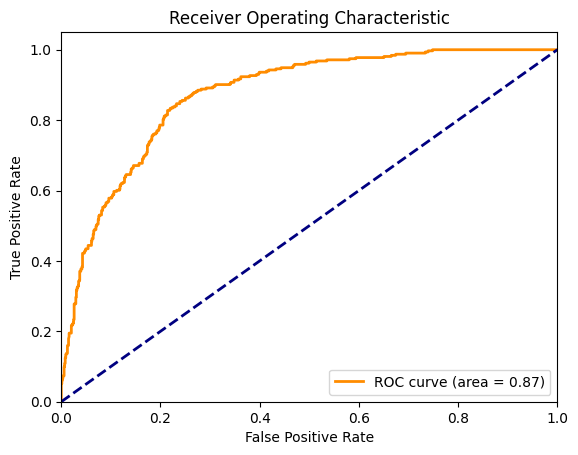

In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load and preprocess your data here

# Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Define independent variables (features) and dependent variable
independent_vars = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                    'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
                    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
                    'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
                    'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
                    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

X = df_encoded[independent_vars]
df_model.loc[:,'Churn_binary'] = df_model['Churn'].replace({'Yes':1,'No':0})
y = df_model['Churn_binary']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix and Classification Report
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## 2.2 Support Vector Machine

Cross-Validation Scores: [0.83333333 0.81111111 0.78888889 0.8        0.78055556]
Mean CV Score: 0.8027777777777778
Confusion Matrix:
[[818  69]
 [150 163]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       887
           1       0.70      0.52      0.60       313

    accuracy                           0.82      1200
   macro avg       0.77      0.72      0.74      1200
weighted avg       0.81      0.82      0.81      1200



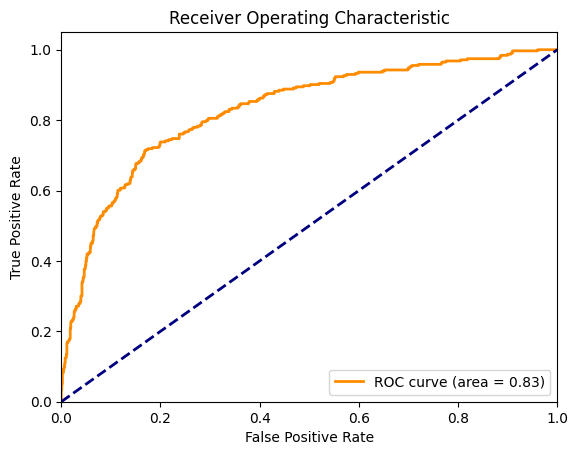

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load and preprocess your data here

# Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Define independent variables (features) and dependent variable
independent_vars = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                    'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
                    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
                    'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
                    'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
                    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

X = df_encoded[independent_vars]
df_model.loc[:,'Churn_binary'] = df_model['Churn'].replace({'Yes':1,'No':0})
y = df_model['Churn_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Support Vector Machine model
model = SVC(probability=True)  # Set probability=True for ROC curve later
model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Confusion Matrix and Classification Report
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## 2.3 Random Forest Classifier

Confusion Matrix:
[[801  86]
 [160 153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       887
           1       0.64      0.49      0.55       313

    accuracy                           0.80      1200
   macro avg       0.74      0.70      0.71      1200
weighted avg       0.78      0.80      0.79      1200



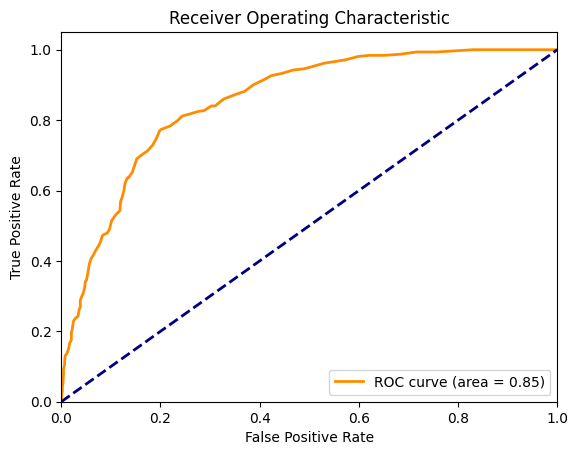

In [228]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load and preprocess your data here

# Encode categorical variables
df_encoded = pd.get_dummies(df_model, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Define independent variables (features) and dependent variable
independent_vars = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                    'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
                    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
                    'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
                    'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
                    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

X = df_encoded[independent_vars]
df_model.loc[:,'Churn_binary'] = df_model['Churn'].replace({'Yes':1,'No':0})
y = df_model['Churn_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit Random Forest Classifier model
model = RandomForestClassifier(random_state=42)  
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 3. Predicting the churn rate

In [229]:
df_prediction = df[3001:]
df_prediction.loc[:,'TotalCharges'] = df_prediction['TotalCharges'].str.replace(' ','0').astype('float')


In [232]:



# Encode categorical variables
df_encoded = pd.get_dummies(df_prediction, columns=['gender', 'Partner', 'Dependents', 'PhoneService',
                                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                         'StreamingTV', 'StreamingMovies', 'Contract',
                                         'PaperlessBilling', 'PaymentMethod'], drop_first=True)

# Define independent variables (features) and dependent variable
independent_vars = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
                    'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
                    'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
                    'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
                    'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
                    'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
                    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

X = df_encoded[independent_vars]

# Standardize features
scaler = StandardScaler()
X_predict_scaled = scaler.fit_transform(X)

# Confusion Matrix and Classification Report
df_prediction.loc[:,'Churn_predicted'] = model.predict(X_predict_scaled)

df_prediction.loc[:,'Churn_predicted'] = df_prediction['Churn_predicted'].replace({1:'Yes',0:'No'})
df_prediction

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_predicted
3001,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No,No
3002,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,...,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No,No
3003,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,...,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes,No
3004,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes,Yes
3005,0516-QREYC,Female,1,No,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.30,459.95,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes


In [244]:
df_prediction['Churn_predicted'].value_counts()

Churn_predicted
No     3184
Yes     858
Name: count, dtype: int64